In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from utils import determine_season, determine_time_of_day

In [2]:
# Load the generated data into a DataFrame
days_to_generate = 1825
generated_data_file = f'data/{days_to_generate}/generated_data.csv'
generated_df = pd.read_csv(generated_data_file, index_col="timestamp")

In [3]:
# Define constants for time calculations
HOURS_PER_DAY = 24
DAYS_PER_WEEK = 7
NUM_WEEKS = 7

In [4]:
# Select data for a specific number of weeks
selected_data = generated_df.iloc[HOURS_PER_DAY * DAYS_PER_WEEK: HOURS_PER_DAY * DAYS_PER_WEEK * NUM_WEEKS]


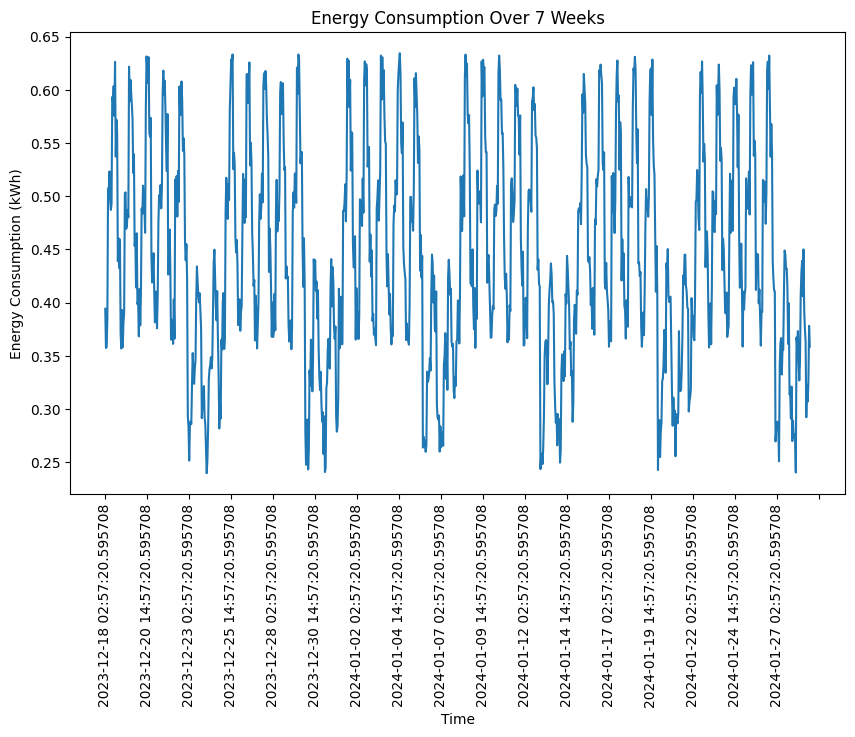

In [5]:
# Plot the energy consumption over the selected weeks
plt.figure(figsize=(10, 6))
plt.plot(selected_data['energy_consumption'])
plt.title(f'Energy Consumption Over {NUM_WEEKS} Weeks')
plt.ylabel('Energy Consumption (kWh)')
plt.xlabel('Time')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [6]:
# One-hot encode categorical variables
encoded_df = pd.get_dummies(generated_df, columns=[
    "hour",
    "day_of_week",
    "month",
    "season",
    "time_of_day",
    "is_weekend"
])
encoded_df.head()

,energy_consumption,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,season_spring,season_summer,season_winter,time_of_day_afternoon,time_of_day_evening,time_of_day_midnight,time_of_day_morning,time_of_day_night,is_weekend_False,is_weekend_True
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-12-11 02:57:20.595708,0.383664,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
2023-12-11 03:57:20.595708,0.390083,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
2023-12-11 04:57:20.595708,0.404565,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
2023-12-11 05:57:20.595708,0.367351,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
2023-12-11 06:57:20.595708,0.521784,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False


In [7]:
# Split the encoded data into features and target
X = encoded_df.drop(columns=["energy_consumption"])
y = encoded_df["energy_consumption"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


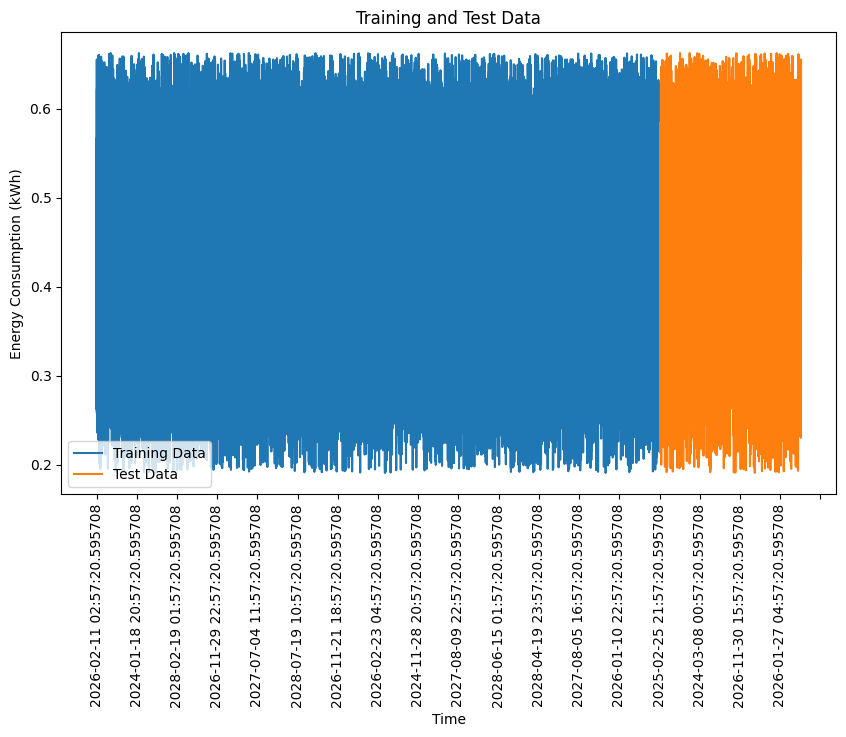

In [8]:
# Plot the test data to see how it compares to the training data
plt.figure(figsize=(10, 6))
plt.plot(X_train.index, y_train, label="Training Data")
plt.plot(X_test.index, y_test, label="Test Data")
plt.title("Training and Test Data")
plt.ylabel("Energy Consumption (kWh)")
plt.xlabel("Time")
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [9]:
# Initialize and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# Make predictions and calculate error metrics
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 0.015232490599571793, RMSE: 0.017729883851838095


In [11]:
# Feature importances
feature_importances = rf_model.feature_importances_
print(feature_importances)


[5.12433457e-05 5.50808388e-05 5.30276240e-05 4.61038489e-05
 5.15132729e-05 4.78021469e-05 5.56433066e-05 5.04051303e-05
 5.17722895e-05 5.01760708e-05 4.67912870e-05 5.22522567e-05
 4.67986637e-05 4.98368402e-05 4.76563011e-05 4.75123020e-05
 4.83130332e-05 4.27192328e-05 3.61076534e-05 4.40072100e-05
 4.08544315e-05 4.62745158e-05 4.67136630e-05 4.69523942e-05
 1.66954930e-04 1.61146924e-04 1.62698436e-04 1.60581525e-04
 1.66828837e-04 8.98060937e-05 9.31592249e-05 6.51878767e-05
 7.58977773e-05 5.17841869e-05 5.43278177e-05 6.62344462e-05
 6.88677273e-05 7.76248752e-05 8.10065206e-05 7.88536249e-05
 8.32164917e-05 8.28504960e-05 6.74020251e-05 1.36689884e-01
 3.28031369e-02 2.74558488e-03 2.54240588e-03 2.49345841e-01
 9.27960331e-03 1.44292423e-01 9.29301454e-03 4.47406919e-02
 2.33706474e-01 1.31550953e-01]


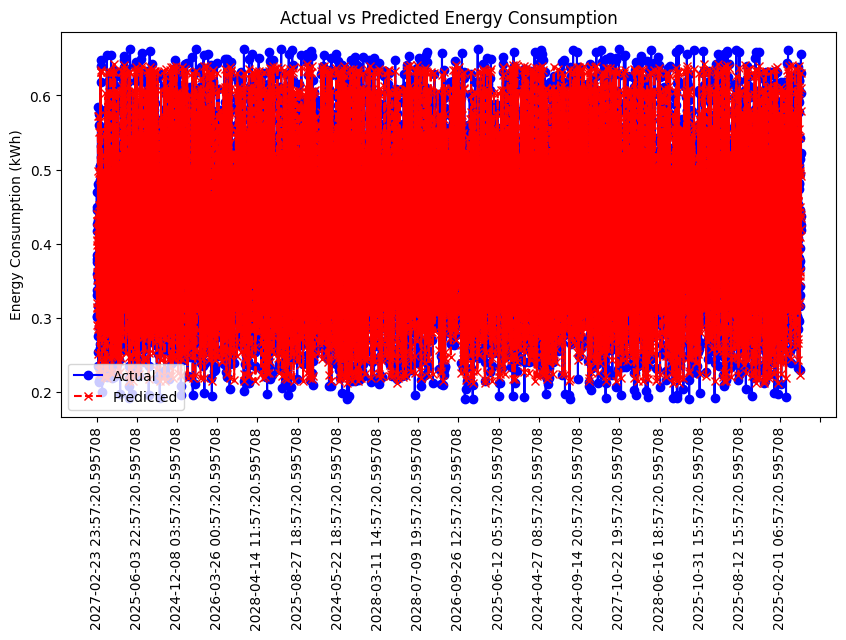

In [12]:
# Predicted vs Actual plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Energy Consumption')
plt.ylabel('Energy Consumption (kWh)')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend()
plt.show()


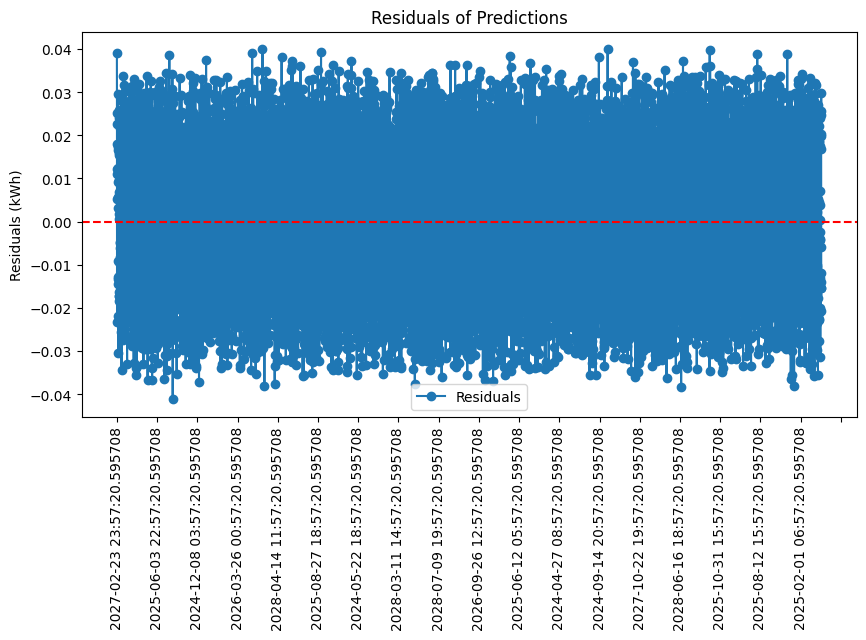

In [13]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, residuals, label='Residuals', marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Predictions')
plt.ylabel('Residuals (kWh)')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend()
plt.show()

In [14]:
# Prediction for a future date
future_date_str = '2027-12-09 13:18:11'
future_date = datetime.strptime(future_date_str, '%Y-%m-%d %H:%M:%S')
future_features = pd.DataFrame(0, index=[0], columns=X_train.columns)

# Set features for the future date
future_features[f'hour_{future_date.hour}'] = 1
future_features[f'day_of_week_{future_date.weekday()}'] = 1
future_features[f'month_{future_date.month}'] = 1
future_features[f'season_{determine_season(future_date)}'] = 1
future_features[f'time_of_day_{determine_time_of_day(future_date)}'] = 1
future_features[f'is_weekend_{future_date.weekday() >= 5}'] = 1

# Align future features with the model's expectations
future_features = future_features.reindex(columns=X_train.columns).fillna(0)
future_features.head()


,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,season_spring,season_summer,season_winter,time_of_day_afternoon,time_of_day_evening,time_of_day_midnight,time_of_day_morning,time_of_day_night,is_weekend_False,is_weekend_True
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [15]:
# Predict energy consumption for the future date
predicted_energy = rf_model.predict(future_features)
print(f"Predicted Energy Consumption for {future_date_str}: {predicted_energy[0]:.2f} kWh")

Predicted Energy Consumption for 2027-12-09 13:18:11: 0.61 kWh


In [16]:

# Calculate the standard deviation of the residuals
std_deviation = np.std(residuals)
print(f"Standard Deviation of Residuals: {std_deviation:.2f} kWh")

# Set a threshold for spike detection
spike_threshold = std_deviation * 3  # adjust the multiplier as needed
print(f"Spike Threshold: {spike_threshold:.2f} kWh")



Standard Deviation of Residuals: 0.02 kWh
Spike Threshold: 0.05 kWh


In [17]:
def preprocess_new_data(new_data, training_columns):
    # Convert new_data to a datetime object
    _timestamp = datetime.strptime(new_data['timestamp'], '%Y-%m-%d %H:%M:%S.%f')

    # Create a DataFrame to hold the features, initialized to 0
    features = pd.DataFrame(0, index=[0], columns=training_columns)

    # Set the appropriate features based on the timestamp
    features['hour_' + str(_timestamp.hour)] = 1
    features['day_of_week_' + str(_timestamp.weekday())] = 1
    features['month_' + str(_timestamp.month)] = 1
    features['season_' + determine_season(_timestamp)] = 1
    features['time_of_day_' + determine_time_of_day(_timestamp)] = 1
    features['is_weekend_' + str(_timestamp.weekday() >= 5)] = 1

    # Ensure that the DataFrame only contains the columns expected by the model
    features = features.reindex(columns=training_columns).fillna(0)

    return features

In [18]:
def preprocess_and_detect_spike(_data_point, actual_consumption, columns, model, threshold):
    # Preprocess the new data
    preprocessed_data = preprocess_new_data(_data_point, columns)

    # Make a prediction for the new data point
    _predicted_consumption = model.predict(preprocessed_data)[0]

    # Calculate the absolute residual
    _absolute_residual = abs(actual_consumption - _predicted_consumption)

    # Check if the absolute residual is greater than the threshold
    _is_spike = _absolute_residual > threshold

    # Detect a spike if the absolute residual is greater than the threshold
    if _is_spike:
        print("*******************************************************************")
        print(
            f"Spike detected! Predicted: {_predicted_consumption:.2f}, Actual: {actual_consumption:.2f}, Residual: {_absolute_residual:.2f}")
        print("*******************************************************************")
    # else:
    #     print("-------------------------------------------------------------------")
    #     print(
    #         f"No spike detected. Predicted: {_predicted_consumption:.2f}, Actual: {actual_consumption:.2f}, Residual: {_absolute_residual:.2f}")
    #     print("-------------------------------------------------------------------")

    return _is_spike, _absolute_residual

In [19]:
# Example usage:
# Assume new_data_point is a dictionary with the new data
test_data_point = {
    'timestamp': '2023-12-09 13:18:11.000000',  # Example timestamp
    'actual_energy_consumption': 0.49  # The actual measured energy consumption
}

# Preprocess and detect a spike
preprocess_and_detect_spike(test_data_point, test_data_point["actual_energy_consumption"], X_train.columns, rf_model,
                            spike_threshold)

*******************************************************************
Spike detected! Predicted: 0.43, Actual: 0.49, Residual: 0.06
*******************************************************************


(True, 0.06176926421245832)

In [20]:
# Assuming y_test is a Series with your test data's energy consumption values
# Let's create a copy, so we don't alter the original data
y_test_modified = y_test.copy()

# Define how many spikes you want to introduce and the magnitude of the spikes
num_spikes = 10  # for example, introduce 10 spikes
spike_magnitude = 2  # the factor by which to increase the energy consumption to simulate a spike

# Randomly select indices to introduce spikes
spike_indices = np.random.choice(y_test_modified.index, num_spikes, replace=False)

# Apply the spikes
for index in spike_indices:
    print(f"Introducing spike at index {index}")
    y_test_modified.at[index] *= spike_magnitude

Introducing spike at index 2028-07-10 04:57:20.595708
Introducing spike at index 2024-10-18 17:57:20.595708
Introducing spike at index 2028-01-27 12:57:20.595708
Introducing spike at index 2025-09-03 02:57:20.595708
Introducing spike at index 2028-06-10 03:57:20.595708
Introducing spike at index 2026-10-25 08:57:20.595708
Introducing spike at index 2028-03-04 23:57:20.595708
Introducing spike at index 2027-05-27 01:57:20.595708
Introducing spike at index 2024-05-04 04:57:20.595708
Introducing spike at index 2024-05-22 19:57:20.595708


In [21]:
# Detect spikes in the test data
spike_detected = []
absolute_residuals = []

for index, row in X_test.iterrows():
    data_point = {
        'timestamp': index,
        'actual_energy_consumption': y_test_modified[index]
    }
    
    is_spike, absolute_residual = preprocess_and_detect_spike(data_point, data_point["actual_energy_consumption"],
                                                              X_train.columns, rf_model, spike_threshold)
    spike_detected.append({
        'timestamp': index,
        "actual_energy_consumption": data_point["actual_energy_consumption"],
        'is_spike': is_spike,
        "absolute_residual": absolute_residual,
    })

*******************************************************************
Spike detected! Predicted: 0.57, Actual: 1.09, Residual: 0.52
*******************************************************************
*******************************************************************
Spike detected! Predicted: 0.28, Actual: 0.61, Residual: 0.32
*******************************************************************
*******************************************************************
Spike detected! Predicted: 0.59, Actual: 1.23, Residual: 0.64
*******************************************************************
*******************************************************************
Spike detected! Predicted: 0.28, Actual: 0.56, Residual: 0.29
*******************************************************************
*******************************************************************
Spike detected! Predicted: 0.40, Actual: 0.82, Residual: 0.42
*******************************************************************
**********

In [22]:
spike_detected_df = pd.DataFrame(spike_detected)
spike_detected_df.head()

,timestamp,actual_energy_consumption,is_spike,absolute_residual
0,2027-02-23 23:57:20.595708,0.469341,False,0.039068
1,2026-11-06 20:57:20.595708,0.384241,False,0.025207
2,2026-03-18 21:57:20.595708,0.375537,False,0.023229
3,2028-11-06 23:57:20.595708,0.379371,False,0.017968
4,2028-07-15 16:57:20.595708,0.445229,False,0.005214


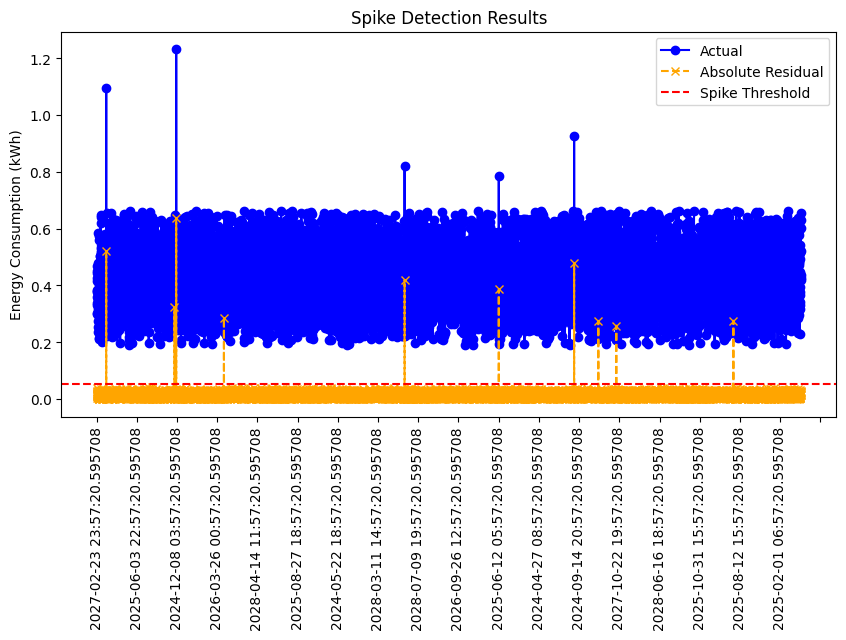

In [23]:
# Plot the spike detection results for the test data
plt.figure(figsize=(10, 5))
plt.plot(spike_detected_df['timestamp'], spike_detected_df['actual_energy_consumption'], label='Actual', color='blue',
         marker='o')
plt.plot(spike_detected_df['timestamp'], spike_detected_df['absolute_residual'], label='Absolute Residual',
            color='orange', linestyle='--', marker='x')
plt.axhline(y=spike_threshold, color='r', linestyle='--', label='Spike Threshold')
plt.title('Spike Detection Results')
plt.ylabel('Energy Consumption (kWh)')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend()
plt.show()

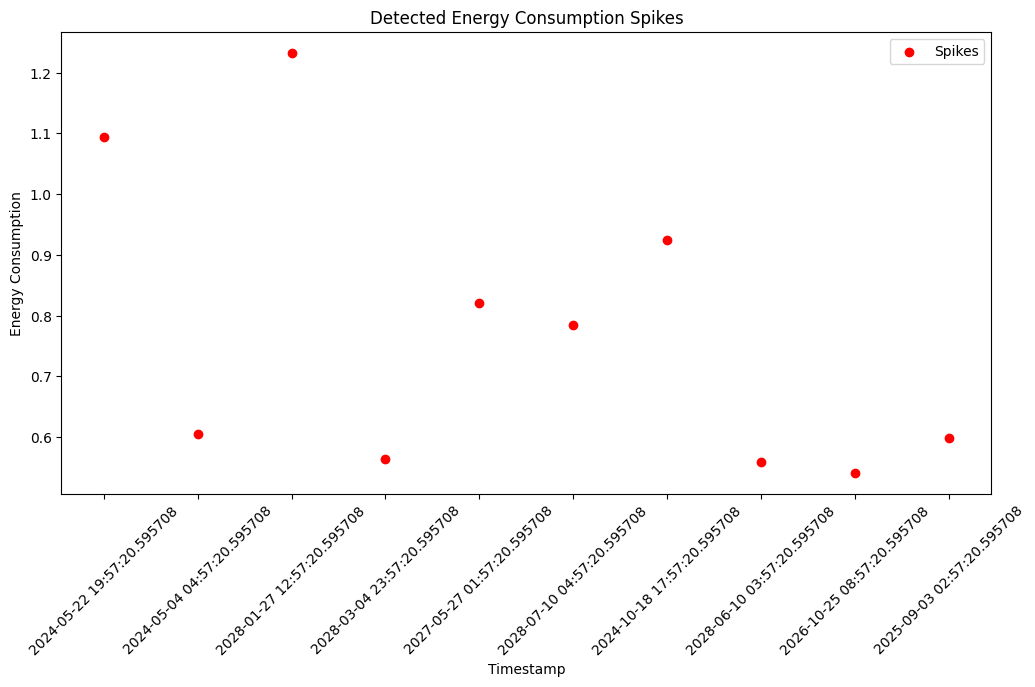

,timestamp,actual_energy_consumption,is_spike,absolute_residual
121,2024-05-22 19:57:20.595708,1.094778,True,0.520917
968,2024-05-04 04:57:20.595708,0.605015,True,0.324127
991,2028-01-27 12:57:20.595708,1.232433,True,0.637859
1584,2028-03-04 23:57:20.595708,0.564870,True,0.286614
3830,2027-05-27 01:57:20.595708,0.820760,True,0.419720
5001,2028-07-10 04:57:20.595708,0.784325,True,0.385847
5938,2024-10-18 17:57:20.595708,0.925415,True,0.477442
6239,2028-06-10 03:57:20.595708,0.559527,True,0.275267
6462,2026-10-25 08:57:20.595708,0.541305,True,0.258249
7918,2025-09-03 02:57:20.595708,0.599364,True,0.275800


In [24]:

# Filter out the rows where a spike is detected
spikes_only = spike_detected_df[spike_detected_df['is_spike']]

# Plotting the spikes
plt.figure(figsize=(12, 6))
plt.scatter(spikes_only['timestamp'], spikes_only['actual_energy_consumption'], color='red', label='Spikes')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.title('Detected Energy Consumption Spikes')
plt.xticks(rotation=45)
plt.legend()
plt.show()

spikes_only.head(20)



In [36]:
import joblib

joblib.dump(rf_model, 'ml-models/rf_model.pkl')

['ml-models/rf_model.pkl']

In [28]:
# Load the model
loaded_model = joblib.load('rf_model.pkl')


In [30]:
# Make predictions and calculate error metrics
loaded_y_pred = loaded_model.predict(X_test)
mae = mean_absolute_error(y_test, loaded_y_pred)
rmse = mean_squared_error(y_test, loaded_y_pred, squared=False)
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 0.015232490599571793, RMSE: 0.017729883851838095


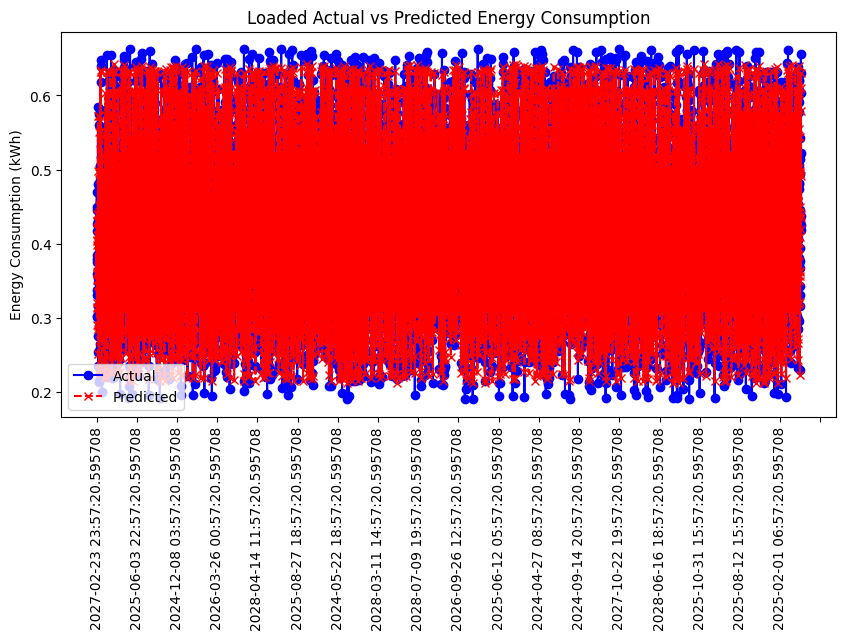

In [32]:
# Predicted vs Actual plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual', color='blue', marker='o')
plt.plot(y_test.index, loaded_y_pred, label='Predicted', color='red', linestyle='--', marker='x')
plt.title('Loaded Actual vs Predicted Energy Consumption')
plt.ylabel('Energy Consumption (kWh)')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend()
plt.show()

In [49]:
# Print the training data columns in array from the model and the training data columns from the original data
print(X_train.columns.values.tolist())

['hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'season_monsoon', 'season_spring', 'season_summer', 'season_winter', 'time_of_day_afternoon', 'time_of_day_evening', 'time_of_day_midnight', 'time_of_day_morning', 'time_of_day_night', 'is_weekend_False', 'is_weekend_True']
